In [112]:
from newsapi import  NewsApiClient
from datetime import date, timedelta

In [113]:
query = 'Apple stock'
newsapi = NewsApiClient(api_key='api_key')
time_period = date.today() - timedelta(days = 7)
articles = newsapi.get_everything(q=query,
                                  from_param = time_period.isoformat(),
                                  language = 'en',
                                  sort_by = 'relevancy',
                                  page_size = 5)
                            
for article in articles['articles']:
    print(article['title'] + " | " + article['publishedAt'] + " | " + article['url'])

The Best Prime Day Deals on Apple Devices | 2023-07-11T15:30:00Z | https://lifehacker.com/the-best-prime-day-deals-on-apple-devices-1850545590
The best Amazon Prime Day deals you can get | 2023-07-11T12:00:00Z | https://www.theverge.com/23787479/amazon-prime-day-best-deals-tech-gadgets-laptops-tvs-earbuds-2023
Bestselling Prime Day deals that are still in stock, according to Amazon | 2023-07-12T18:45:18Z | https://arstechnica.com/shopping/2023/07/best-selling-prime-day-deals-that-are-still-in-stock-according-to-amazon/
What tech boom? A homebuilder, 3 cruise lines, and Chipotle have all outperformed Apple and Microsoft on the S&P 500 this year | 2023-07-11T09:05:15Z | https://markets.businessinsider.com/news/stocks/us-stocks-homebuilder-cruises-chipotle-outperforming-apple-netflix-2023-7
Apple Card Review 2023 | 2023-07-14T21:17:06Z | https://www.businessinsider.com/personal-finance/apple-card-review


___

In [114]:
import sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

#nltk.download('vader_lexicon')

pd.set_option('display.max_colwidth',1000)

SIA = SentimentIntensityAnalyzer()

In [115]:
# Retrieves a list of news sources based on the specified category.
def get_sources(category = None):
  newsapi = NewsApiClient(api_key='api_key')
  sources = newsapi.get_sources()
  
  if category is not None:
    result = [source['id'] for source in sources['sources'] if source['category'] == category and source['language'] == 'en']
  else:
    result = [source['id'] for source in sources['sources'] if source['language'] == 'en']
  
  return result

len(get_sources())  

81

In [116]:
#Get the list of the business news sources

get_sources('business')

['australian-financial-review',
 'bloomberg',
 'business-insider',
 'business-insider-uk',
 'financial-post',
 'fortune',
 'the-wall-street-journal']

In [117]:
time_period = (date.today() - timedelta(days = 30)).isoformat()

time_object = datetime.strptime(time_period, '%Y-%m-%d')

time_period = time_object.strftime('%d-%b-%Y')

print(time_period)

17-Jun-2023


In [122]:
def get_articles_sentiments(keywrd, startd, sources_list=None, show_all_articles=False):
    newsapi = NewsApiClient(api_key='api_key')

    if type(startd) == str:
        my_date = datetime.strptime(startd, '%d-%b-%Y')
    else:
        my_date = startd

    if sources_list:
        articles = newsapi.get_everything(
            q=keywrd, from_param=my_date.isoformat(), to=(my_date + timedelta(days=30)).isoformat(),
            language="en", sources=",".join(sources_list), sort_by="relevancy", page_size=100
        )
    else:
        articles = newsapi.get_everything(
            q=keywrd, from_param=my_date.isoformat(), to=(my_date + timedelta(days=30)).isoformat(),
            language="en", sort_by="relevancy", page_size=100
        )

    article_content = ''
    date_sentiments = {}
    date_sentiments_list = []
    seen = set()

    for article in articles['articles']:
        if str(article['title']) in seen:
            continue
        else:
            seen.add(str(article['title']))

        article_content = str(article['title']) + '. ' + str(article['description'])
        sentiment = SIA.polarity_scores(article_content)['compound']

        date_sentiments.setdefault(my_date, []).append(sentiment)
        date_sentiments_list.append((sentiment, article['url'], article['title'], article['description']))

    date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse=True)
    sent_list = list(date_sentiments.values())[0]

    return pd.DataFrame(date_sentiments_list, columns=['Sentiment', 'URL', 'Title', 'Description'])


0.219212
100
0         Nvidia's stellar rally so far has dominated the US stock market, but the company's stock price is overvalued even considering its bright future.
1                                               Insider's Phil Rosen breaks down the central bank chairman's testimony and how the stock market responded.
2                                                 Even a shallow recession could wreak havoc on stock prices, "Dr. Doom" economist Nouriel Roubini warned.
3     Morgan Stanley's Adam Jonas slashed his Tesla rating Thursday, warning earnings could fall as Elon Musk's EV maker presses ahead with its price war.
4     Fundstrat expects low inflation readings to continue throughout the summer, which would embolden investors who expect a soft landing in the economy.
                                                                              ...                                                                         
95        "We reckon that the excess liquid assets held b

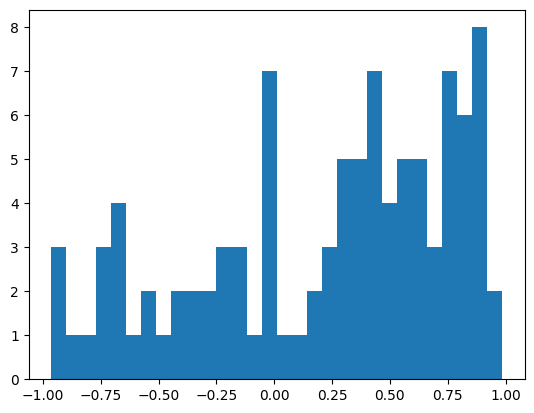

In [119]:
sources = get_sources('business')
return_articles = get_articles_sentiments('stock',time_period,sources_list = sources, show_all_articles = True)
return_articles.Sentiment.hist(bins = 30, grid = False)

print(return_articles.Sentiment.mean())

print(return_articles.Sentiment.count())

print(return_articles.Description)

In [121]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL']].head(2)

,Sentiment,URL
80,-0.9643,https://markets.businessinsider.com/news/stocks/jeremy-grantham-gmo-superbubble-ai-stocks-housing-market-bubble-crash-2023-7
2,-0.9393,https://markets.businessinsider.com/news/stocks/nouriel-roubini-economy-recession-tropical-storm-financial-crisis-dr-doom-2023-6
